# Data Analysis using Julia

<p>This blog is an inspiration from Anshul Joshi's latest book: "Learning Julia"<br>
This will help you to get started with basic Julia data analysis and Visualisation using DataFrames.  

## What is Julia?

#### Julia: “Walks like python. Runs like C.”
<p>Julia is a high level, high performance, dynamic programming language, for technical computating, with syntax familiar to users of other technical computing enviroment.<br>
It provides a sophisticated compiler, distributed parallel execution, numerical accuracy, and an extensive mathematical function library.</p>

<h2>Installation</h2>

<p>Before we start, we need to install Julia and its specific packages.<br>
 <h3>Installing Julia</h3><br>
<ol><li>Download Julia for your specific system from here:</li><br>
<a href> https://julialang.org/downloads/ </a>
<li>Follow the platform-specific instructions to install Julia on your system from here</li>
<a href>https://julialang.org/downloads/platform.html</a><br>
<h3>Installing IJulia and Jupyter Notebook.</h3><br>
Data science and scientific computing are privileged to have an amazing interactive tool
called Jupyter Notebook. With Jupyter Notebook, you can write and run code in an
interactive web environment with many capabilities.<br>
Go to the Julia prompt and type the following code:




In [ ]:
julia> Pkg.add("IJulia")

<p>After ijulia is successfully installed you can type the following code to run it,</p>

In [ ]:
julia> using IJulia
julia> notebook()

<p> Now, Let's start exploring Julia with Jupyter Notebook.

## Exploratory Analysis with Julia. 

<p>A lot of time is spent by data scientists in transforming raw data into a useable format.<br>
Julia provides and extensive library for dealing with raw data and transforming them into some meaningful format.<br></p>
<p>The first step in any kind of data analysis is exploring the dataset at hand. There are two ways to do that, the first is exploring the data tables and applying statistical methods to find patterns in numbers and the second is plotting the data to find patterns visually.</p>
<p>Julia provides DataFrames for exploring data and applying statistical methods.

<h3>Introduction to DataFrames.jl</h3>

<p>A dataframe is similar to Excel workbook – you have column names referring to columns and you have rows, which can be accessed with the use of row numbers. The essential difference is that column names and row numbers are known as column and row index, in case of dataframes . This is similar to pandas.DataFrame in Python or data.table in R.</p>
<p>Julia provides a package named DataFrames.jl, which provides the necessary data structures for loading table like data from different sources like: csv, txt or excel.

In [ ]:
julia> Pkg.add("DataFrames.jl")

<p>Let's work on a real world scenario, for better a understanding.<br>
The dataset is Loan Approval dataset which can be downloaded from <a href=https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/>here</a> .<br>
The description of the variables are: </p>
<img src="Screen-Shot-2017-10-21-at-14.40.44.png">

### Importing library and dataset

In [ ]:
using DataFrames

#read csv file into DataFrame
df= readtable("train.csv", separator=',')

<p>Now, we have loaded the data into dataframe.
let's explore the data using different dataframe's function in Julia.</p>



<h3>Dataframe functions</h3>

In [3]:
size(df)

(614, 13)

In [4]:
names(df)

13-element Array{Symbol,1}:
 :Loan_ID          
 :Gender           
 :Married          
 :Dependents       
 :Education        
 :Self_Employed    
 :ApplicantIncome  
 :CoapplicantIncome
 :LoanAmount       
 :Loan_Amount_Term 
 :Credit_History   
 :Property_Area    
 :Loan_Status      

<p>The dataset is not that big(614 rows).<br>
    Let’s look at the first 10 rows to get a better feel of how our data looks like?<br>
    The <b>head(,n)</b> function is used to read the first n rows of a dataset.</p>


In [5]:
head(df,10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001002,Male,No,0,Graduate,No,5849,0.0,NA,360,1,Urban,Y
2,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360,1,Rural,N
3,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360,1,Urban,Y
4,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360,1,Urban,Y
5,LP001008,Male,No,0,Graduate,No,6000,0.0,141,360,1,Urban,Y
6,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267,360,1,Urban,Y
7,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95,360,1,Urban,Y
8,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158,360,0,Semiurban,N
9,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168,360,1,Urban,Y
10,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349,360,1,Semiurban,N


<p>By looking into the above data we can conclude that:
    <ul><li>Gender, Married, Dependents,Education, Self_Employed, Credit_History, Loan_Status are all categorical variable, with two categories</li>
        <li>Loan_ID is a unique column, it doesn't provide any valueable information.
         <li>LoanAmount variable contains missing values.


<h3>Numerical Data</h3>
<p>Let's explore the LoanAmount column.<br>
    <b>describe()</b> function returns all the possible statistical inferences(Min,Max, Mean) that can be made
from the given data.

In [6]:
describe(df[:LoanAmount])

Summary Stats:
Mean:           146.412162
Minimum:        9.000000
1st Quartile:   100.000000
Median:         128.000000
3rd Quartile:   168.000000
Maximum:        700.000000
Length:         592
Type:           Int64
Number Missing: 22
% Missing:      3.583062


<h3>Categorical Data</h3>
<p> For non-numerical variable like: Education, Property_Area, we can check the frequency distribution of the variable, 
to understanand whether the data makes sense or not<br>
<b>countmap()</b> function is a map function that maps the values to the number of
occurrences (or total weights) in the dataset:

In [7]:
countmap(df[:Property_Area])

Dict{Union{DataArrays.NAtype, String},Int64} with 3 entries:
  "Urban"     => 202
  "Rural"     => 179
  "Semiurban" => 233

<h3>Dealing with Missing data</h3>


Using the <b>showcols()</b> function we can check for missing values in each of the variables:

In [8]:
showcols(df)

614×13 DataFrames.DataFrame
│ Col # │ Name              │ Eltype  │ Missing │
├───────┼───────────────────┼─────────┼─────────┤
│ 1     │ Loan_ID           │ String  │ 0       │
│ 2     │ Gender            │ String  │ 13      │
│ 3     │ Married           │ String  │ 3       │
│ 4     │ Dependents        │ String  │ 15      │
│ 5     │ Education         │ String  │ 0       │
│ 6     │ Self_Employed     │ String  │ 32      │
│ 7     │ ApplicantIncome   │ Int64   │ 0       │
│ 8     │ CoapplicantIncome │ Float64 │ 0       │
│ 9     │ LoanAmount        │ Int64   │ 22      │
│ 10    │ Loan_Amount_Term  │ Int64   │ 14      │
│ 11    │ Credit_History    │ Int64   │ 50      │
│ 12    │ Property_Area     │ String  │ 0       │
│ 13    │ Loan_Status       │ String  │ 0       │

<p>As we can see LoanAmount and Credit_History have maximun number of missing values<br>
</p>

<p>There are multiple ways of fixing missing values in a dataset.<br> Take LoanAmount for example, there are numerous ways to fill the missing values – <i>the simplest being replacement by the mean.</i><br>
We will be replacing the missing values in LoanAmount variable with its mean:

In [ ]:
#replace missing loan amount with mean of loan amount
df[isna.(df[:LoanAmount]),:LoanAmount] = floor(mean(dropna(df[:LoanAmount])))

#replace 0.0 of loan amount with the mean of loan amount 
df[df[:LoanAmount] .== 0, :LoanAmount] = floor(mean(dropna(train[:LoanAmount])))

<p>Now, if we cross-check the LoanAmount variable, we can see there is no more missing value.</p> 

In [9]:
describe(df[:LoanAmount])

Summary Stats:
Mean:           146.412162
Minimum:        9.000000
1st Quartile:   100.000000
Median:         128.000000
3rd Quartile:   168.000000
Maximum:        700.000000
Length:         592
Type:           Int64
Number Missing: 22
% Missing:      3.583062


<p>For categorical data, we can replace the missing values with mode of the entire column.

In [10]:
 #replace missing gender with mode of gender values
 df[isna.(df[:Gender]), :Gender] = mode(dropna(df[:Gender]))

"Male"

In [11]:
describe(df[:Gender])

Summary Stats:
Length:         614
Type:           String
Number Unique:  2
Number Missing: 0
% Missing:      0.000000


<p>Similarly we can remove the missing values from each of the variable.<br>
For more detail on data munging and data explorartion with Julia please refer the book: "Julia for Data Science"

<h2> Visualisation in Julia </h2>
<p>"Another effective way of exploring the data is by doing it visually using various kind of plots.<br>
Here we will be be focusing on creating some of the very simple and easily used
graphs and plots. The library of choice which we will be using to create such plots will
    be <b>PyPlot</b>, which is based on Python's matplotlib.pyplot module.</p>
 

<h3>Basic Plot</h3>

In [12]:
using PyPlot

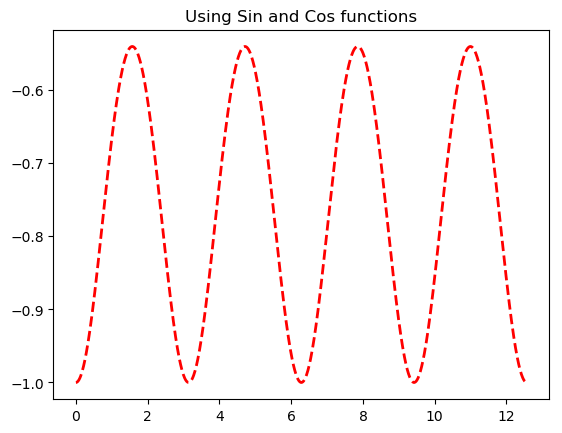

PyObject Text(0.5,1,u'Using Sin and Cos functions')

In [13]:
x = linspace(0,4pi,1000) 
y = cos.(pi + sin.(x))
plot(x, y, color="red", linewidth=2.0, linestyle="--")
title("Using Sin and Cos functions")

<h4>Bar graphs</h4>

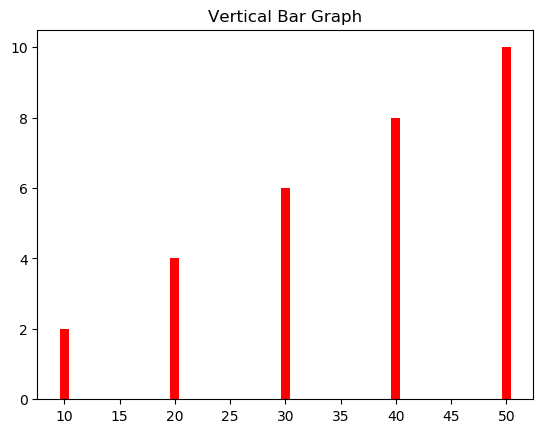

(PyObject <matplotlib.patches.Rectangle object at 0x000000002CCF1710>, PyObject <matplotlib.patches.Rectangle object at 0x000000002CCF14E0>, PyObject <matplotlib.patches.Rectangle object at 0x000000002CCF19E8>, PyObject <matplotlib.patches.Rectangle object at 0x000000002CCF1D30>, PyObject <matplotlib.patches.Rectangle object at 0x000000002CCF1F98>)

In [14]:
x= [10,20,30,40,50]; y= [2,4,6,8,10]
title("Vertical Bar Graph")
bar(x,y, color="red")

<h4>Histogram</h4>

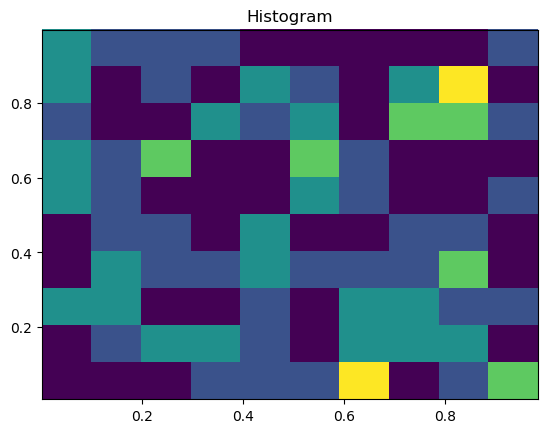

([0.0 0.0 … 2.0 2.0; 0.0 1.0 … 0.0 1.0; … ; 1.0 2.0 … 4.0 0.0; 3.0 0.0 … 0.0 1.0], [0.00251388, 0.100606, 0.198699, 0.296792, 0.394884, 0.492977, 0.591069, 0.689162, 0.787254, 0.885347, 0.983439], [0.00705159, 0.105957, 0.204863, 0.303768, 0.402674, 0.501579, 0.600485, 0.69939, 0.798296, 0.897201, 0.996107], PyObject <matplotlib.image.AxesImage object at 0x000000002C99C6D8>)

In [15]:
x= rand(100)
y= rand(100)
title("Histogram")
hist2D(x,y, bins= 10)


<h3>Plotting DataFrames with Gadfly</h3>
<p>Gadfly is an exhaustive plotting and data visualization package written in Julia by Daniel
Jones. It is largely inspired by ggplot2 for R,


In [17]:
using Gadfly

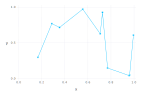

In [18]:
Gadfly.plot(x=rand(10), y=rand(10), Geom.point, Geom.line)

<p>Now that we are familiar with basic data visualisation, let us study the distribution of various variables in our Loan Approval dataset.<br>
Let us start with numeric variables – namely ApplicantIncome and LoanAmount

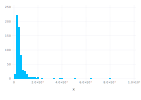

In [19]:
Gadfly.plot(x=dropna(df[:ApplicantIncome]), Geom.histogram(bincount=50))

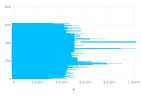

In [20]:
Gadfly.plot(x=dropna(df[:ApplicantIncome]),Geom.boxplot)

<p>By looking into above two graphs, we can depict that there are some extreme values for Applicant Income.

<p>Now, Let’s look at the histogram and boxplot of LoanAmount: </p>

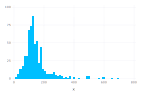

In [21]:
Gadfly.plot(x=dropna(df[:LoanAmount]), Geom.histogram(bincount=50))

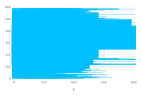

In [32]:
Gadfly.plot(x=dropna(df[:LoanAmount]), Geom.boxplot)

<p>Again, there are some extreme values. Clearly, both ApplicantIncome and LoanAmount require some amount of data munging. LoanAmount has missing and well as extreme values, while ApplicantIncome has a few extreme values.<br>
You can learn more of data visualisation using Gadfly from <a href> http://gadflyjl.org/stable/tutorial.html>  </a>

<h2>Calling Python Library in Julia</h2>

<p>Julia provides functionality to call libraries of Python and R.<br>
Using another language inside Julia may not be the best of ideas as far as speed and
efficiency is concerned. But, there may be situations when you would be required to do so.<br>
    Here is how we can call python library using <i>PyCall</i>

In [ ]:
julia> Pkg.add("PyCall")

In [ ]:
using PyCall
@pyimport pandas as pd
df1= pd.read_csv("train.csv")

<p>I hope, this blog will help you get started with Julia.<br>
For a deep level understanding of Julia and its data analysis functionality please refer Learning Julia <a href> https://www.packtpub.com/application-development/learning-julia>  </a> <br>

Also,Jupyter Notebook used in this article is available on GitHub. <a href> https://github.com/za1drahman/Data-Analysis-using-Julia.git/> </a>